# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

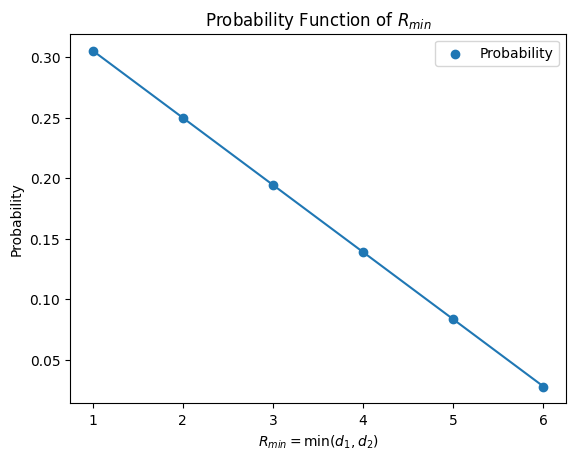

   R_min  Probability
0      1     0.305556
1      2     0.250000
2      3     0.194444
3      4     0.138889
4      5     0.083333
5      6     0.027778
Expected Value: 2.5866666666666664


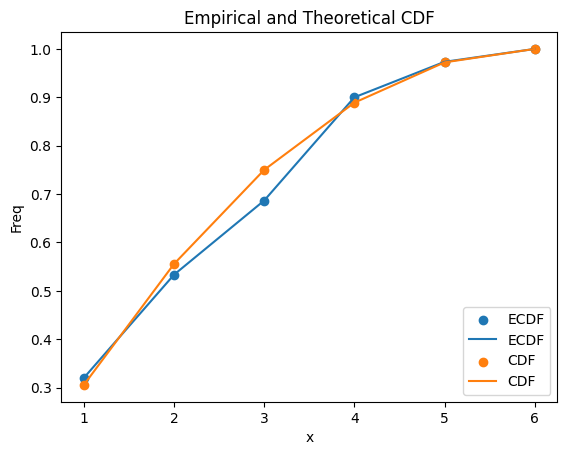

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dice faces
D = [1, 2, 3, 4, 5, 6]
pr = np.zeros(6)  # array of 1 through 6 slots
R = np.arange(1, 7)

# Compute probabilities
for i in range(6):
    for j in range(6):
        temp = min(D[i], D[j]) 
        pr[temp - 1] += 1 / 36  # subtract 1 to match zero-based indexing for `pr`


plt.scatter(R, pr, label='Probability')
plt.plot(R, pr)
plt.xlabel("$R_{min} = \\min(d_1, d_2)$")
plt.ylabel("Probability")
plt.title("Probability Function of $R_{min}$")
plt.legend()
plt.show()

df = pd.DataFrame({'R_min': R, 'Probability': pr})
print(df)

F = np.cumsum(pr) # Cumulative summation of p

# plt.scatter(R,F)
# plt.plot(R,F)
# plt.xlabel("x")
# plt.ylabel("F(x) = pr[min(d1,d2) <= x]")
# plt.title('Distribution Function of the Minimum of Two Die')
# plt.show()

df = pd.DataFrame({'x':R,'F':F})
df

N = 150
d1 = np.random.choice(D, size=N)
d2 = np.random.choice(D, size=N)
min_roll = [ min([d1[i], d2[i]]) for i in range(N) ]
ecdf = np.zeros(6)

for i in range(6):
    ecdf[i] = (1/N)*np.sum( min_roll <= R[i] )

expected_value = np.sum(min_roll)/N
print(f"Expected Value: {expected_value}")

plt.scatter(R,ecdf,label='ECDF')
plt.plot(R,ecdf,label='ECDF')
plt.scatter(R,F,label='CDF')
plt.plot(R,F,label='CDF')
plt.xlabel("x")
plt.ylabel("Freq")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.

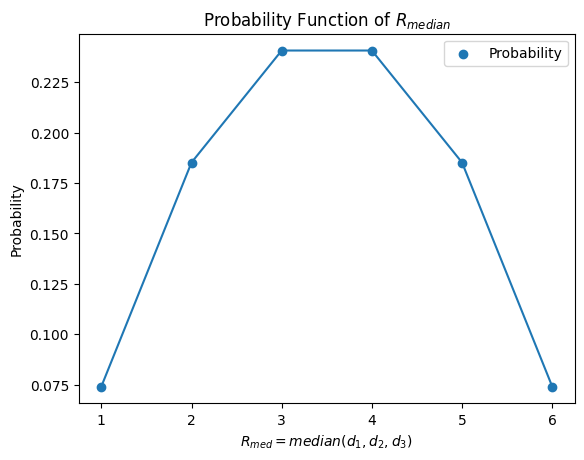

   R_median  Probability
0         1     0.074074
1         2     0.185185
2         3     0.240741
3         4     0.240741
4         5     0.185185
5         6     0.074074
Expected Value: 3.52


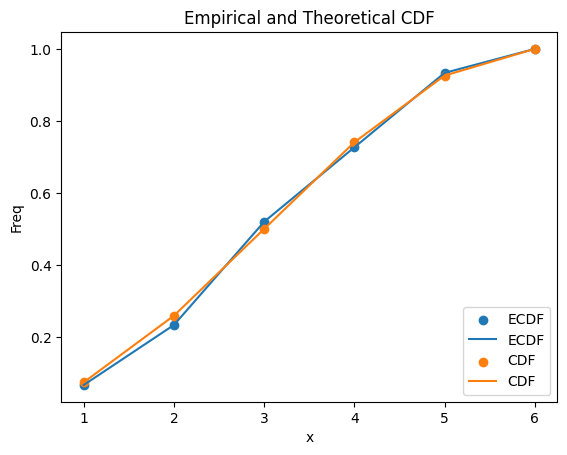

In [17]:
# 2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dice faces
D = [1, 2, 3, 4, 5, 6]
pr = np.zeros(6)  # array of 1 through 6 slots
R = np.arange(1, 7)

# Compute probabilities
for i in range(6):
    for j in range(6):
        for k in range(6):
            temp = np.median([D[i], D[j], D[k]])
            pr[int(temp) - 1] += 1 / 216  # subtract 1 to match zero-based indexing for `pr`


plt.scatter(R, pr, label='Probability')
plt.plot(R, pr)
plt.xlabel("$R_{med} = median(d_1, d_2, d_3)$")
plt.ylabel("Probability")
plt.title("Probability Function of $R_{median}$")
plt.legend()
plt.show()

df = pd.DataFrame({'R_median': R, 'Probability': pr})
print(df)

F = np.cumsum(pr) # Cumulative summation of p

# plt.scatter(R,F)
# plt.plot(R,F)
# plt.xlabel("x")
# plt.ylabel("F(x) = pr[med(d1,d2,d3) <= x]")
# plt.title('Distribution Function of the Median of Three Die')
# plt.show()

df = pd.DataFrame({'x':R,'F':F})
df

N = 150
d1 = np.random.choice(D, size=N)
d2 = np.random.choice(D, size=N)
d3 = np.random.choice(D, size=N)
med_roll = [np.median([d1[i], d2[i], d3[i]]) for i in range(N)] 
ecdf = np.zeros(6)

for i in range(6):
    ecdf[i] = (1/N)*np.sum( med_roll <= R[i] )

expected_value = np.sum(med_roll)/N
print(f"Expected Value: {expected_value}")

plt.scatter(R,ecdf,label='ECDF')
plt.plot(R,ecdf,label='ECDF')
plt.scatter(R,F,label='CDF')
plt.plot(R,F,label='CDF')
plt.xlabel("x")
plt.ylabel("Freq")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()


3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [20]:
import seaborn as sns

def roll():
    D = [1, 2, 3, 4, 5, 6]
    dice = np.random.choice(D)
    total = dice
    while dice == 6:
        dice = np.random.choice(D)
        total += dice
    return total

N = 100000
results = []
for i in range(N):
    results.append(roll())

expected_value = np.sum(results)/N
print(f"Expected Value: {expected_value}")

Expected Value: 4.1927


count    32.000000
mean     19.281250
std      11.362742
min       1.000000
25%       9.750000
50%      19.500000
75%      28.250000
max      40.000000
Name: roll, dtype: float64


,roll,count,probability
0,1,16823,0.16823
1,3,16747,0.16747
2,2,16659,0.16659
3,5,16590,0.16590
4,4,16480,0.16480
5,7,2861,0.02861
6,11,2772,0.02772
7,9,2772,0.02772
8,10,2763,0.02763
9,8,2746,0.02746


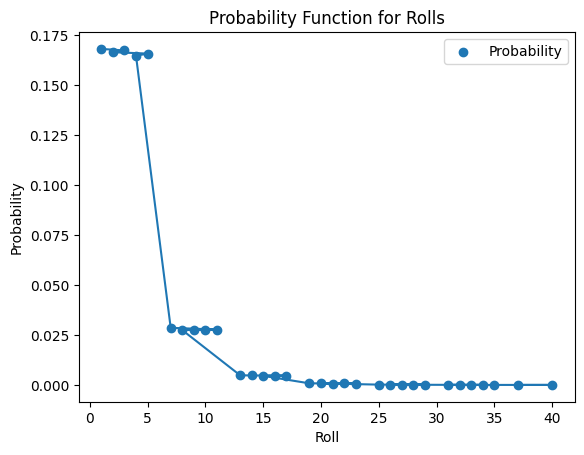

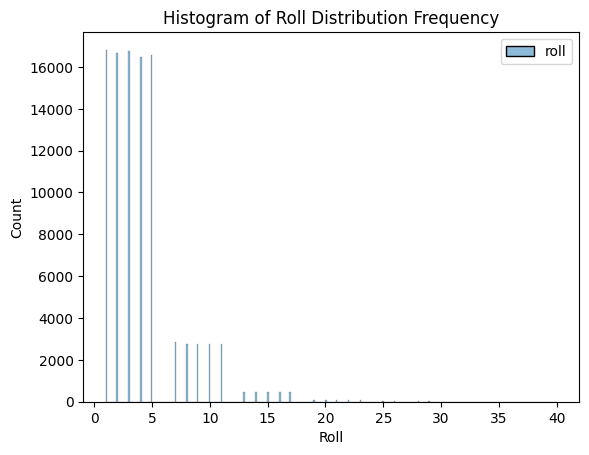

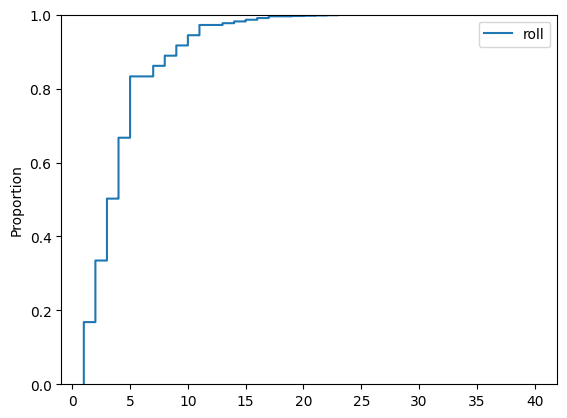

In [23]:
results = pd.DataFrame(results, columns=["roll"])

value_counts = results["roll"].value_counts().reset_index()
value_counts.columns = ["roll", "count"]

value_counts["probability"] = value_counts["count"] / N

print(value_counts["roll"].describe())

display(value_counts)

plt.scatter(value_counts["roll"], value_counts["probability"], label='Probability')
plt.plot(value_counts["roll"], value_counts["probability"])
plt.xlabel("Roll")
plt.ylabel("Probability")
plt.title("Probability Function for Rolls")
plt.legend()
plt.show()

sns.histplot(results)
plt.title("Histogram of Roll Distribution Frequency")
plt.xlabel("Roll")
plt.show()

sns.ecdfplot(results)
plt.show()


**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups. 
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

In [34]:
import pandas as pd

df = pd.read_csv("data/mammogram.csv")

cross_tab = pd.crosstab(df["treatment"], df["breast_cancer_death"], margins=True)
print(cross_tab, "\n")
cross_tab2 = pd.crosstab(df["treatment"], df["breast_cancer_death"], margins=True, normalize=True)
print(cross_tab2)

survival_rates = 1 - cross_tab["yes"] / cross_tab["All"]
print("\nSurvival Rates:")
print(survival_rates)

# Calculate the difference in survival rates
diff_survival = survival_rates["mammogram"] - survival_rates["control"]
print(f"\nDifference in 25-year survival rates: {diff_survival}")

breast_cancer_death     no   yes    All
treatment                              
control              44405   505  44910
mammogram            44425   500  44925
All                  88830  1005  89835 

breast_cancer_death        no       yes       All
treatment                                        
control              0.494295  0.005621  0.499917
mammogram            0.494518  0.005566  0.500083
All                  0.988813  0.011187  1.000000

Survival Rates:
treatment
control      0.988755
mammogram    0.988870
All          0.988813
dtype: float64

Difference in 25-year survival rates: 0.00011505110015985753


2. Bootstrap the densities and distributions of survival rates for the two groups. 

In [37]:
df.head()

,treatment,breast_cancer_death
0,mammogram,yes
1,mammogram,yes
2,mammogram,yes
3,mammogram,yes
4,mammogram,yes


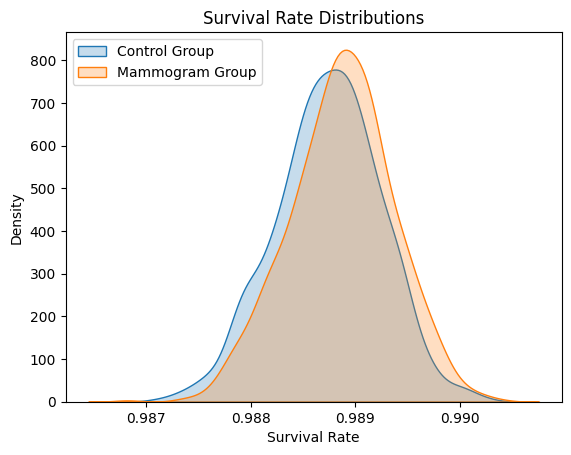

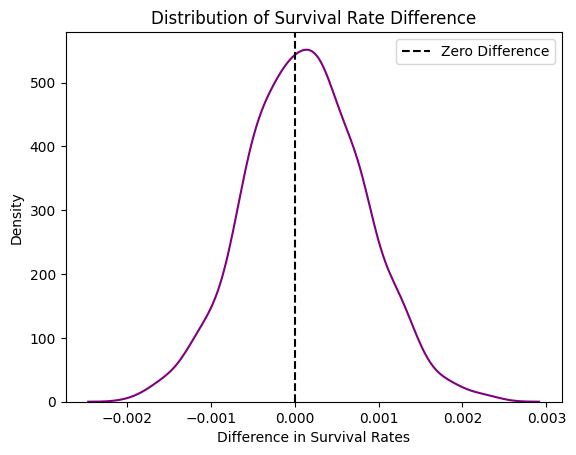

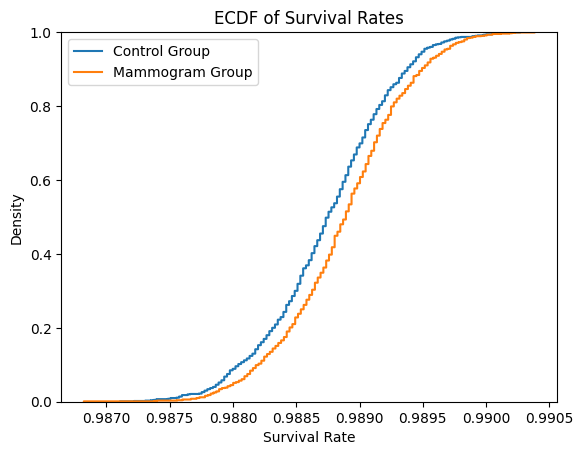

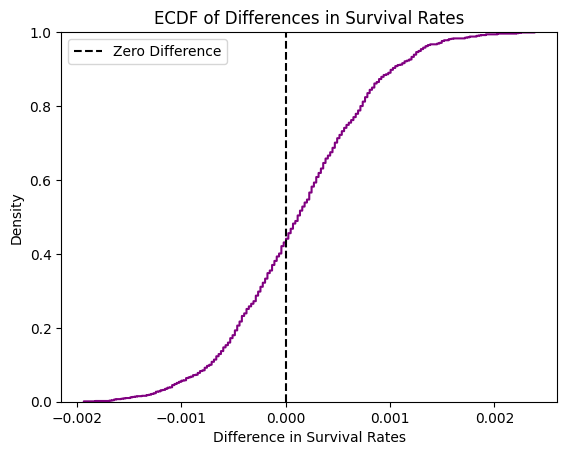

In [43]:
S = 1000 
rate_control = np.zeros(S)  # to store bootstrap survival rates for the control group
rate_mammogram = np.zeros(S)  # to store bootstrap survival rates for the mammogram group
diff = np.zeros(S)  # to store the differences in survival rates


control_group = df[df["treatment"] == "control"]
mammogram_group = df[df["treatment"] == "mammogram"]


N_control = len(control_group)
N_mammogram = len(mammogram_group)

# Bootstrapping
for s in range(S):
    sample_control = control_group.sample(N_control, replace=True)
    sample_mammogram = mammogram_group.sample(N_mammogram, replace=True)
    
    rate_control[s] = 1 - sample_control["breast_cancer_death"].value_counts(normalize=True).get("yes", 0)
    rate_mammogram[s] = 1 - sample_mammogram["breast_cancer_death"].value_counts(normalize=True).get("yes", 0)
    
    diff[s] = rate_mammogram[s] - rate_control[s]


sns.kdeplot(rate_control, label="Control Group", fill=True)
sns.kdeplot(rate_mammogram, label="Mammogram Group", fill=True)
plt.xlabel("Survival Rate")
plt.ylabel("Density")
plt.title("Survival Rate Distributions")
plt.legend()
plt.show()

sns.kdeplot(diff, color="purple")
plt.axvline(0, color="black", linestyle="--", label="Zero Difference")
plt.xlabel("Difference in Survival Rates")
plt.ylabel("Density")
plt.title("Distribution of Survival Rate Difference")
plt.legend()
plt.show()

sns.ecdfplot(rate_control, label="Control Group")
sns.ecdfplot(rate_mammogram, label="Mammogram Group")
plt.xlabel("Survival Rate")
plt.ylabel("Density")
plt.title("ECDF of Survival Rates")
plt.legend()
plt.show()

sns.ecdfplot(diff, color="purple")
plt.axvline(0, color="black", linestyle="--", label="Zero Difference")
plt.xlabel("Difference in Survival Rates")
plt.ylabel("Density")
plt.title("ECDF of Differences in Survival Rates")
plt.legend()
plt.show()



3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [47]:
ci_lower = np.percentile(diff, 0.5)
ci_upper = np.percentile(diff, 99.5)

print(f"99% Confidence Interval for Difference: [{ci_lower}, {ci_upper}]")

99% Confidence Interval for Difference: [-0.00164334013974895, 0.002029657683015797]


4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results? 

The confidence interval suggests that the difference in survival rates between the control and mammogram groups is very small and includes values very very close to zero, indicating there is limited evidence for a substantial effect. The conclusions drawn would be that mammograms don't have a big impact on survival rates, but this data  would overstate this conclusion.
This dataset is definitely an oversimplification;
The dataset does not include crucial demographic factors such as age, genetic predisposition, or lifestyle factors like smoking, diet, or exercise. The dataset only considers breast cancer deaths, ignoring deaths due to other causes (e.g., heart disease, accidents). Lastly, the survival metric is binary (yes/no), which simplifies the outcome. Additional measures like stages of detected cancers would offer richer insights into the impact of treatments.


**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?